# Time the functions

This notebooks measures the runtime of each functionality.

In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import cProfile

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


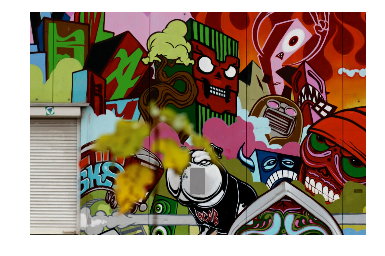

In [3]:
#Load the image
path_to_image = 'images/graffiti.jpg'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [4]:
%%timeit
#Time: creation of the detector
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

The slowest run took 29.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.61 µs per loop


In [5]:
det = sr.SalientDetector(SE_size_factor=0.20,
                                lam_factor=4)

In [6]:
%%timeit
#Time: detect all regions in color image
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)

1 loop, best of 3: 5.15 s per loop


In [7]:
cProfile.run('det.detect(img, find_holes=True, find_islands=True, find_indentations=True, \
                    find_protrusions=True, visualize=False)')

         2132 function calls in 5.700 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    5.700    5.700 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 _methods.py:25(_amax)
      480    0.000    0.000    0.003    0.000 _methods.py:31(_sum)
        1    0.007    0.007    1.237    1.237 binarization.py:143(binarize_withthreshold)
        1    0.000    0.000    1.237    1.237 binarization.py:229(binarize)
        1    0.000    0.000    0.000    0.000 binarydetector.py:112(reset)
        2    0.000    0.000    0.131    0.065 binarydetector.py:124(get_holes)
        2    0.000    0.000    0.323    0.161 binarydetector.py:136(get_islands)
        1    0.000    0.000    2.464    2.464 binarydetector.py:148(get_protrusions)
        1    0.000    0.000    1.540    1.540 binarydetector.py:157(get_indentations)
        2    0.000    0.000    0.449    0.225 binarydetector.py:166(_detect_h

In [8]:
%%timeit
#Only holes and islands
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=False,
                    find_protrusions=False,
                    visualize=False)

1 loop, best of 3: 1.32 s per loop


## Binarization

In [9]:
lam_factor = 3
area_factor_large = 0.001
area_factor_verylarge = 0.1
lam = 50
connectivity = 4
weights=(0.33,0.33,0.33)
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
%%timeit
#Creation of the binarizer
binarizer = sr.DatadrivenBinarizer(area_factor_large=area_factor_large, area_factor_verylarge=area_factor_verylarge, 
                                           lam=lam, weights=weights, connectivity=connectivity)

The slowest run took 7.17 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.14 µs per loop


In [11]:
binarizer = sr.DatadrivenBinarizer(area_factor_large=area_factor_large, area_factor_verylarge=area_factor_verylarge, 
                                           lam=lam, weights=weights, connectivity=connectivity)

In [12]:
%%timeit
#The binarization
binarized = binarizer.binarize(grayscale, visualize=False)

1 loop, best of 3: 880 ms per loop


In [13]:
cProfile.run('binarizer.binarize(grayscale, visualize=False)')

         1782 function calls in 1.176 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.176    1.176 <string>:1(<module>)
        3    0.000    0.000    0.000    0.000 _methods.py:25(_amax)
      480    0.000    0.000    0.003    0.000 _methods.py:31(_sum)
        1    0.010    0.010    1.176    1.176 binarization.py:143(binarize_withthreshold)
        1    0.000    0.000    1.176    1.176 binarization.py:229(binarize)
        1    0.000    0.000    1.176    1.176 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.min}
        3    0.002    0.001    0.002    0.001 {built-in method numpy.core.multiarray.zeros}
      160    1.136    0.007    1.136    0.007 {connectedComponentsWithStats}
        1    0.000    0.000    0.000    0.000 {method 'argmax' of 'numpy.ndarray' 

## Binary detection

In [14]:
binarized = binarizer.binarize(grayscale, visualize=False)
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=True,
                    find_protrusions=True, 
                    visualize=False)
se = det.SE

In [15]:
area_factor=0.05

In [16]:
%%timeit
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
regions = detector.detect(binarized, visualize=False)

1 loop, best of 3: 4.49 s per loop


In [17]:
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
cProfile.run('detector.detect(binarized, visualize=False)')

         1088 function calls in 5.229 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.228    5.228 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 binarydetector.py:112(reset)
        2    0.000    0.000    0.261    0.131 binarydetector.py:124(get_holes)
        2    0.000    0.000    0.295    0.147 binarydetector.py:136(get_islands)
        1    0.000    0.000    2.939    2.939 binarydetector.py:148(get_protrusions)
        1    0.000    0.000    1.733    1.733 binarydetector.py:157(get_indentations)
        2    0.000    0.000    0.532    0.266 binarydetector.py:166(_detect_holelike)
        2    0.252    0.126    4.672    2.336 binarydetector.py:189(_detect_protrusionlike)
        6    0.532    0.089    0.571    0.095 binarydetector.py:245(_remove_small_elements)
      148    0.049    0.000    0.248    0.002 binarydetector.py:300(_fill_image)
        1    0.000    0.000

In [18]:
#Only holes and islands
detector = sr.BinaryDetector(se, lam, area_factor, connectivity)
cProfile.run('detector.detect(binarized, find_indentations=False, \
                    find_protrusions=False, visualize=False)')

         32 function calls in 0.677 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.676    0.676 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 binarydetector.py:112(reset)
        1    0.000    0.000    0.266    0.266 binarydetector.py:124(get_holes)
        1    0.000    0.000    0.410    0.410 binarydetector.py:136(get_islands)
        2    0.000    0.000    0.657    0.329 binarydetector.py:166(_detect_holelike)
        2    0.636    0.318    0.657    0.329 binarydetector.py:245(_remove_small_elements)
        2    0.001    0.001    0.019    0.009 binarydetector.py:300(_fill_image)
        1    0.000    0.000    0.676    0.676 binarydetector.py:60(detect)
        2    0.000    0.000    0.000    0.000 {bitwise_and}
        5    0.001    0.000    0.001    0.000 {bitwise_not}
        1    0.000    0.000    0.677    0.677 {built-in method builtins.exec}
        4    0.001 

## MSER detection

In [19]:
mser = cv2.MSER_create()

In [20]:
%%timeit
regions = mser.detectRegions(img, None)

1 loop, best of 3: 433 ms per loop


In [21]:
cProfile.run('mser.detectRegions(img, None)')

         4 function calls in 0.680 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.680    0.680 <string>:1(<module>)
        1    0.000    0.000    0.680    0.680 {built-in method builtins.exec}
        1    0.680    0.680    0.680    0.680 {method 'detectRegions' of 'cv2.MSER' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Conclusion
The tophat operation (for protrusions and indentations) is the bottleneck, takes 4.9 (of in total 5.7) seconds.
The binarization is also quite slow because the function `connectedComponentsWithStats` is called for every threshold level.

The MSER detection is somewhat faster for a color image (about 2-3 times as fast).

In [22]:
%timeit cv2.morphologyEx(binarized, cv2.MORPH_TOPHAT, se)

1 loop, best of 3: 1.16 s per loop


In [23]:
%timeit cv2.morphologyEx(binarized, cv2.MORPH_OPEN, se)

1 loop, best of 3: 1.17 s per loop


In [24]:
%timeit cv2.erode(binarized, se)
%timeit cv2.dilate(binarized, se)

1 loop, best of 3: 583 ms per loop
1 loop, best of 3: 597 ms per loop
